<a href="https://colab.research.google.com/github/nhuyen183/LungCancerSupportSystem/blob/master/ITDSIU18048_quiz_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 1 (50 points)
You are given a file `appl_stock.csv`, please carry out the following tasks:

1. Read this file by PySpark. Print out the schema.
2. Create columns of `day of month`, `hour`, `day of year`, `month` from the column `Date` of the data.
3. Using `groupby` and `year()` function to compute the average closing price per year.

In [ ]:
#@title Installing Spark and dependencies
#Java 8
#Apache Spark with hadoop and
#Findspark (used to locate the spark in the system)
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

#Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"
import findspark
findspark.init()

In [ ]:
import pandas as pd

In [ ]:
#@title Create Spark entry points
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession

sc = SparkContext(conf=SparkConf())
spark = SparkSession(sparkContext=sc)

In [ ]:
#@title 1.Read this file by PySpark. Print out the schema.
stock_data = spark.read.csv('./appl_stock.csv', inferSchema=True, header=True)

# preview the data
# data type
print('-'*10, 'data types', '-'*10)
pd.DataFrame(stock_data.dtypes)

In [ ]:
stock_data.printSchema()

In [ ]:
stock_data.show(6)

In [ ]:
#@title 2.Create columns of day of month, hour, day of year, month from the column Date of the data.
import pyspark.sql.functions as f
stock_data = stock_data.withColumn('Day of Month',f.dayofmonth(f.to_timestamp('Date', 'yyyy-MM-dd')))\
                       .withColumn('Hour',f.hour(f.to_timestamp('Date', 'yyyy-MM-dd')))\
                       .withColumn('Day of Year',f.dayofyear(f.to_timestamp('Date', 'yyyy-MM-dd')))\
                       .withColumn('Month',f.month(f.to_timestamp('Date', 'yyyy-MM-dd')))

stock_data.show()

In [ ]:
#@title 3.Using groupby and year() function to compute the average closing price per year.
stock_data.groupBy(f.year(f.to_timestamp('Date', 'yyyy-MM-dd'))).avg('Close').show(6)

## Exercise 2 (50 points)

1. Incrementally calculate the mean `base_salary` of all CSVs in `/payroll-small/` using pandas. Time the entire computation using `%%time` as the first line of the cell. Do not use any Dask functions.
2. Load all the payroll CSVs using `dask.read_csv` and assign it to payroll. Calculate the number of partitions in the DataFrame.
3. Calculate the mean of the `payroll.base_salary` Dask DataFrame. How do the timings compare for the Dask and Pandas versions.


In [46]:
import os
from glob import glob

import dask.dataframe as dd
import pandas as pd

In [ ]:
# Uncomment the following lines if you want to use the distributed scheduler
# from dask.distributed import Client
# client = Client()

In [47]:
!unzip payroll-small.zip

Archive:  payroll-small.zip
replace payroll-small/payroll_2018.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: payroll-small/payroll_2018.csv  
replace payroll-small/payroll_2019.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: payroll-small/payroll_2019.csv  
replace payroll-small/payroll_2017.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: payroll-small/payroll_2017.csv  


In [48]:
payroll_glob = glob("./payroll-small/*.csv")
appended_data = []  # create a list
for f in payroll_glob:
    df = pd.read_csv(f, index_col=None)
appended_data.append(df)  # append to the list
payroll_glob = pd.concat(appended_data, axis=0)

__Exercise__ 

Incrementally calculate the mean `base_salary` of all CSVs in `/payroll-small/` using `pandas`. Time the entire computation using `%%time` as the first line of the cell.

Do not use any Dask functions.

In [49]:
!ls ./payroll-small/

payroll_2017.csv  payroll_2018.csv  payroll_2019.csv


In [50]:
%%time
payroll_glob.head(5)

CPU times: user 0 ns, sys: 448 µs, total: 448 µs
Wall time: 461 µs


,fiscal_year,agency_name,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2018,DEPARTMENT OF CORRECTION,2004-02-12,QUEENS,CORRECTION OFFICER,ACTIVE,85292.0,per Annum,2045.72,83363.77,863.1,58483.97,13199.03
1,2018,ADMIN FOR CHILDREN'S SVCS,2004-03-08,MANHATTAN,PROGRAM EVALUATOR,ACTIVE,74796.0,per Annum,1790.00,74591.13,8.0,994.25,1000.92
2,2018,BOARD OF ELECTION POLL WORKERS,2015-01-01,MANHATTAN,ELECTION WORKER,ACTIVE,1.0,per Hour,0.00,300.00,0.0,0.00,0.00
3,2018,CITY COUNCIL,2018-03-05,MANHATTAN,LEGISLATIVE COUNSEL,ACTIVE,86000.0,per Annum,560.00,26389.04,0.0,0.00,0.00
4,2018,FINANCIAL INFO SVCS AGENCY,2000-04-30,MANHATTAN,COMPUTER SYSTEMS MANAGER,CEASED,223463.0,per Annum,1370.00,231361.44,0.0,0.00,0.00


In [51]:
payroll_glob.shape

(27308, 13)

In [52]:
%%time
payroll_glob_mean = payroll_glob['base_salary'].mean()
payroll_glob_mean

CPU times: user 3.38 ms, sys: 0 ns, total: 3.38 ms
Wall time: 3.31 ms


45742.93511242127

__Exercise__

Load all the payroll CSVs using `dd.read_csv` and assign it to `payroll`. Calculate the number of partitions in the DataFrame.

In [24]:
payroll = dd.read_csv("./payroll-small/*.csv")

In [25]:
payroll

,fiscal_year,agency_name,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
npartitions=3,,,,,,,,,,,,,
,int64,object,object,object,object,object,float64,object,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...


In [26]:
payroll.npartitions

3

In [27]:
payroll.head(compute=False)

,fiscal_year,agency_name,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
npartitions=1,,,,,,,,,,,,,
,int64,object,object,object,object,object,float64,object,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...


We now have 4 tasks (3 partitions + 1 head task) that have not yet been evaluated.

__Exercise__

Calculate the mean of the `payroll.base_salary` Dask DataFrame. How do the timings compare for the Dask and Pandas versions.

In [61]:
%%time
payroll_dask_mean = payroll['base_salary'].mean().compute()
payroll_dask_mean

CPU times: user 149 ms, sys: 9.24 ms, total: 158 ms
Wall time: 120 ms


44387.192021095216

/usr/local/lib/python3.8/dist-packages/dask/dataframe/core.py:1994: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meta = self._meta_nonempty.mean(axis=axis, skipna=skipna)


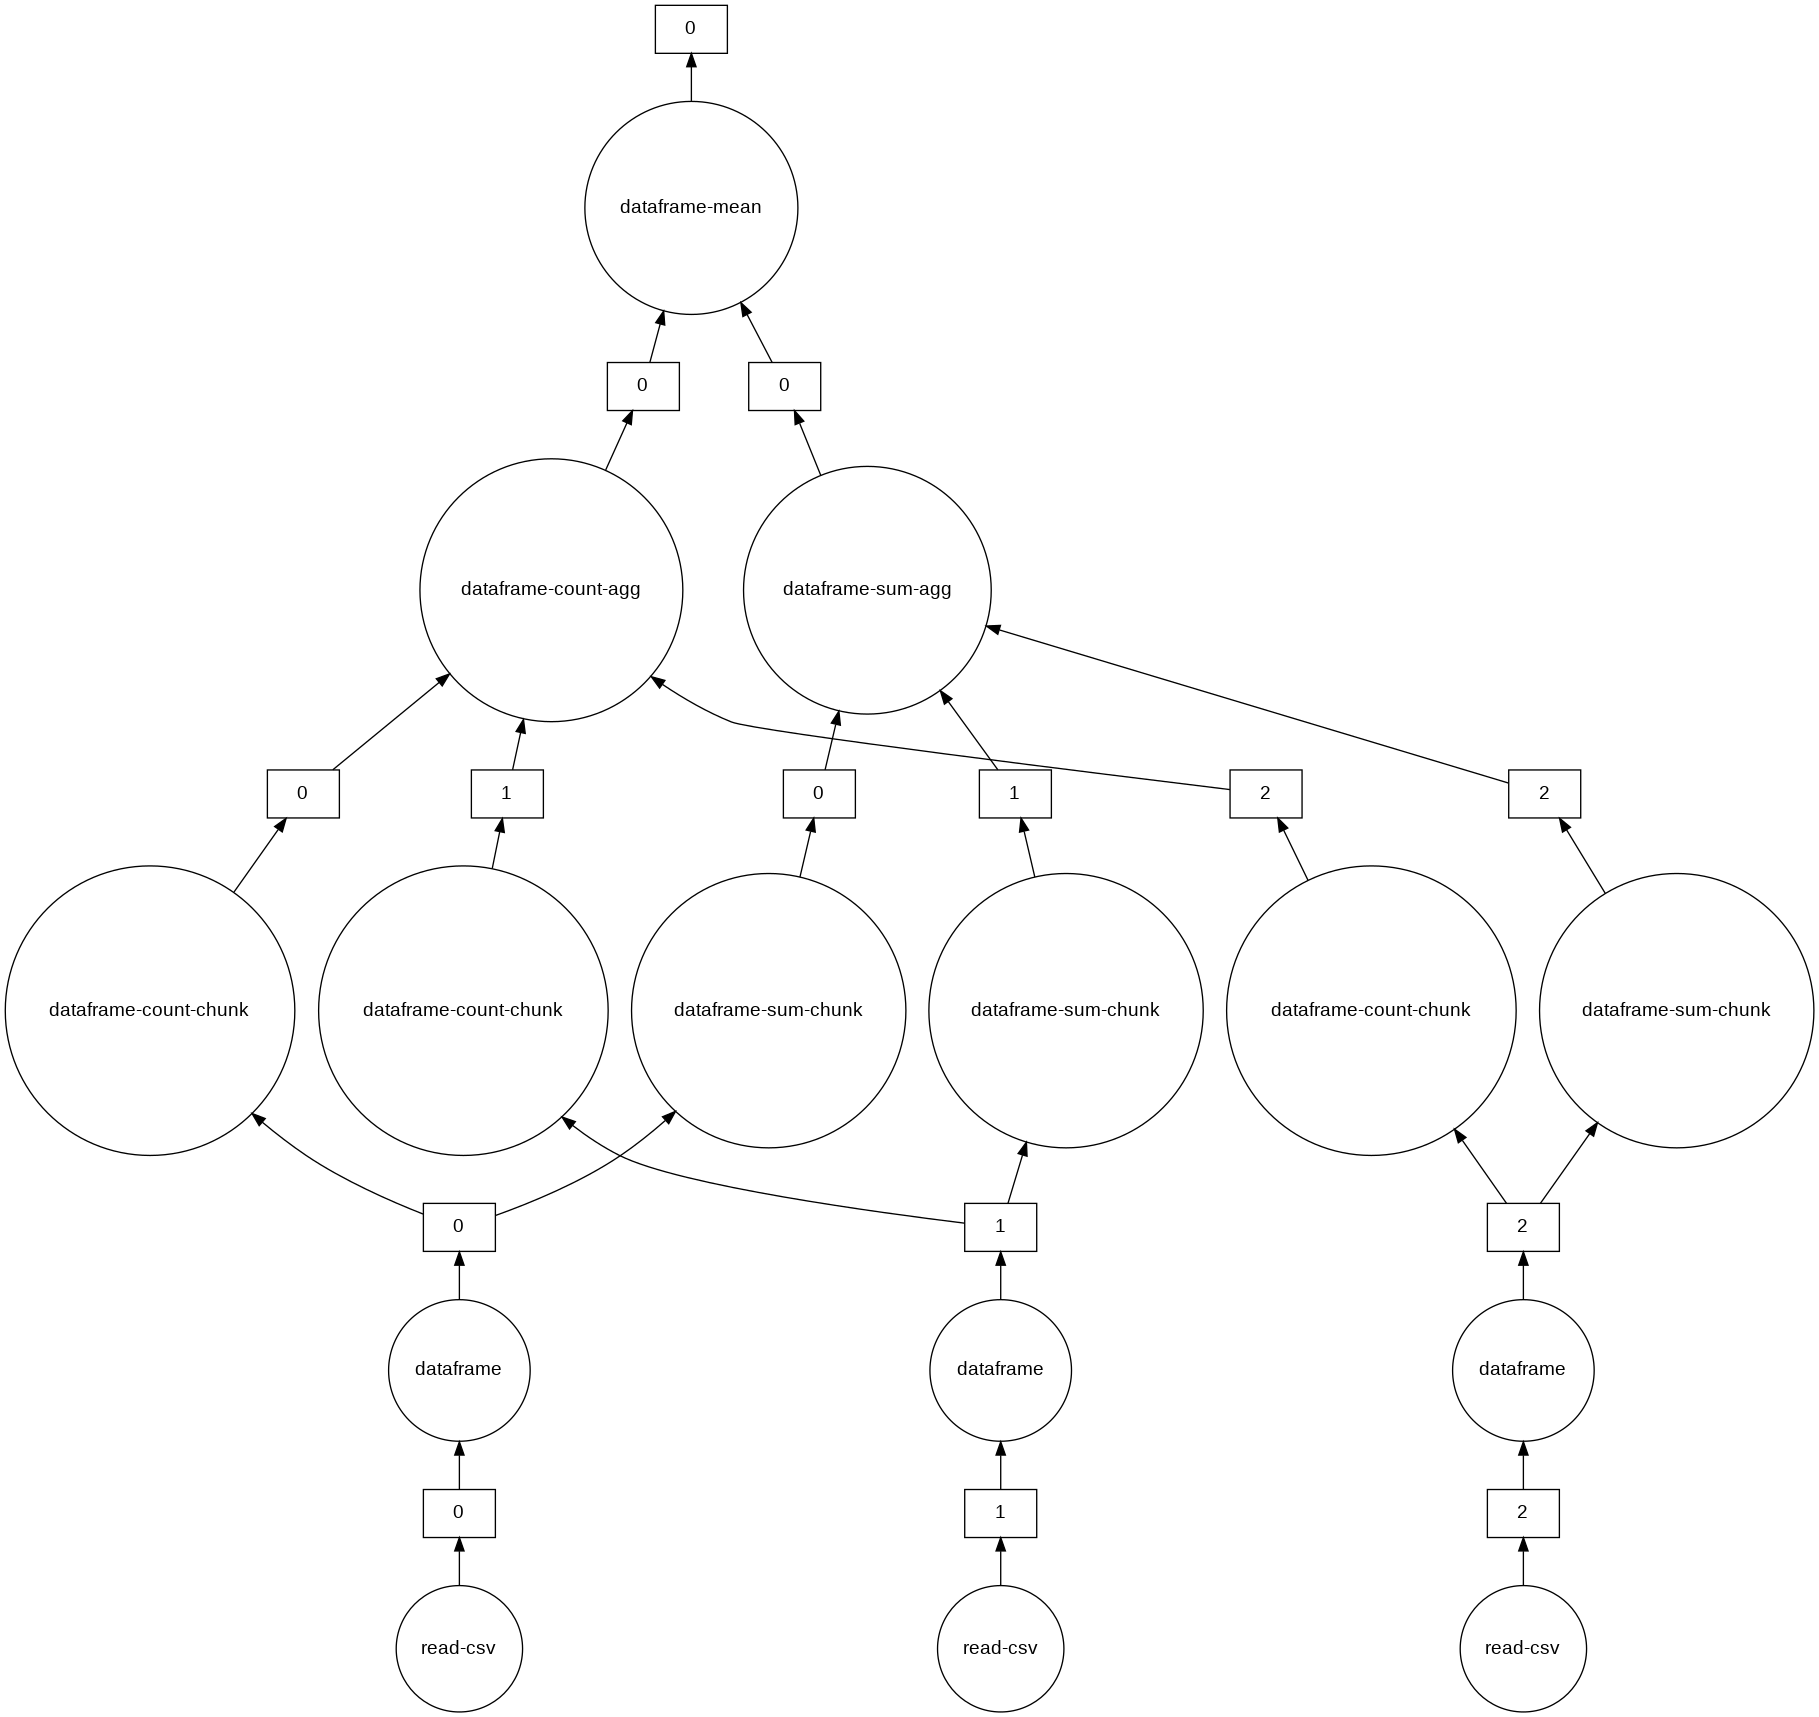

In [62]:
payroll.mean().visualize()